In [1]:
import os

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
REPO_ROOT = '/Users/rwegener/repos/chesapeake_mhw'

In [3]:
path = os.path.join(REPO_ROOT, 'data/interim', 
                    'geopolar_climatology_chesapeake.nc')
clim = xr.open_dataarray(path)

In [4]:
oneyear = clim.sel(time=slice('2003-01-01', '2003-12-31'))

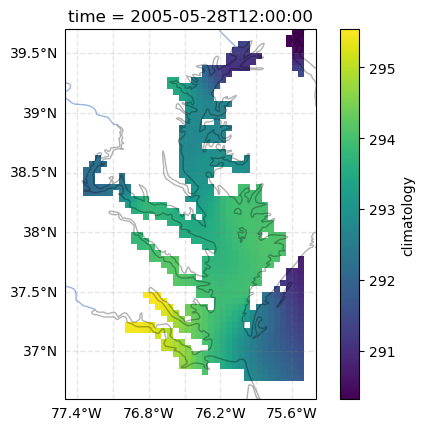

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add background features
ax.add_feature(cfeature.COASTLINE, alpha=0.3)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)

ax.set_extent([-77.5, -75.4, 36.6, 39.7])

# Add and format gridlines. Remove top and right labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.2, linestyle='--')
gl.top_labels, gl.right_labels = False, False

# index 100 and 1000 are quite different
clim.isel(time=1000).plot(ax=ax)
# oneyear.mean(['time']).plot(ax=ax)

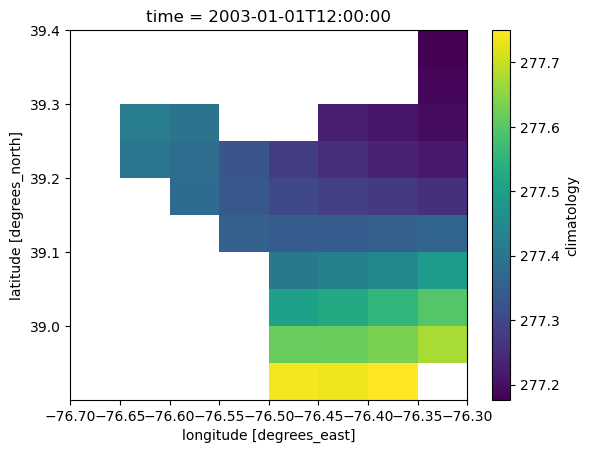

In [12]:
oneyear.sel(lat=slice(38.9, 39.4), lon=slice(-76.7, -76.3)).isel(time=0).plot()

Baltimore Region

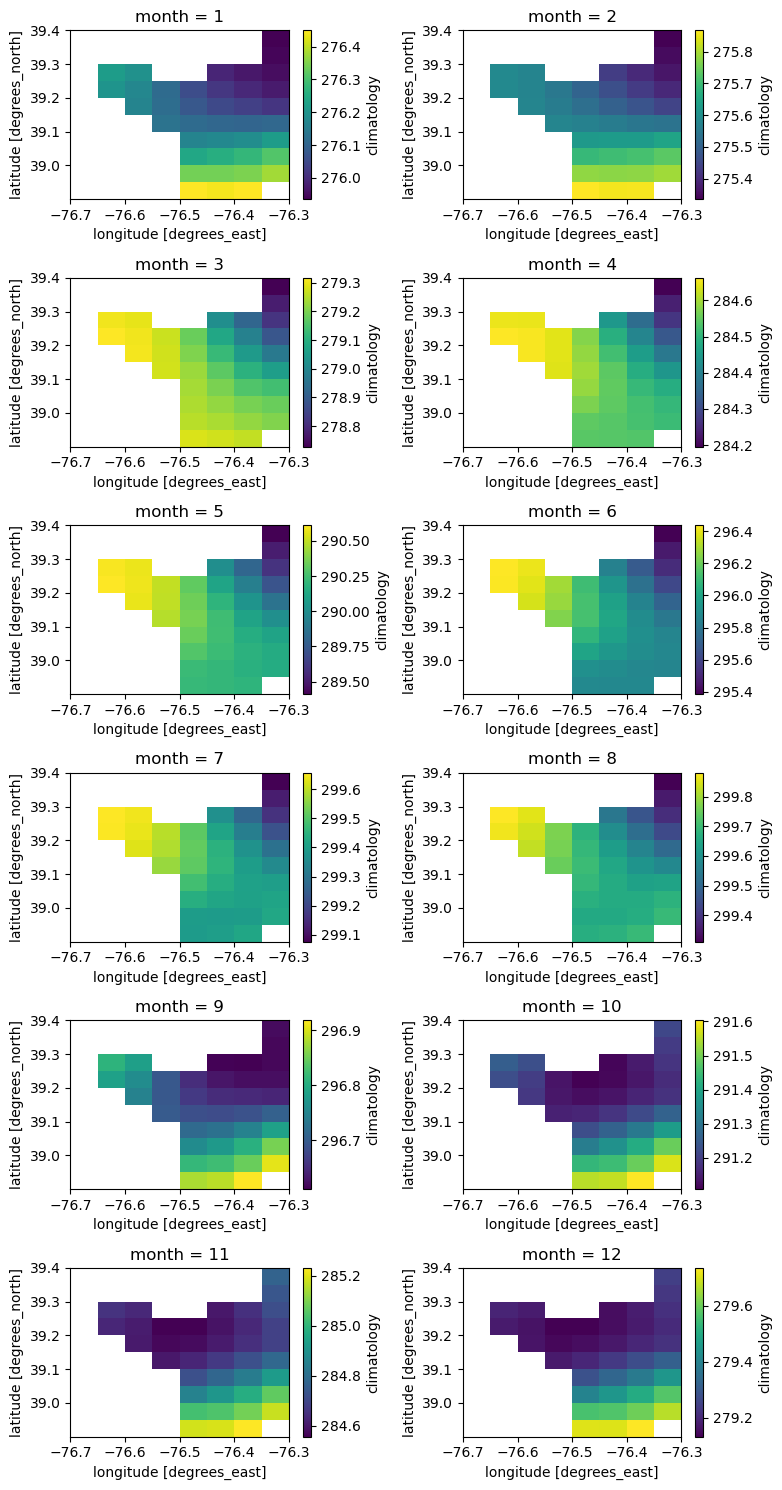

In [13]:
fig, axes = plt.subplots(6, 2)
fig.set_size_inches(8, 15)

axes = axes.flatten()
for i in range(12):
    # Just Patapsco outflow
    oneyear.sel(lat=slice(38.9, 39.4), lon=slice(-76.7, -76.3)).groupby('time.month').mean().sel(month=i+1).plot(ax=axes[i])
    
plt.tight_layout()

Calvert Cliffs

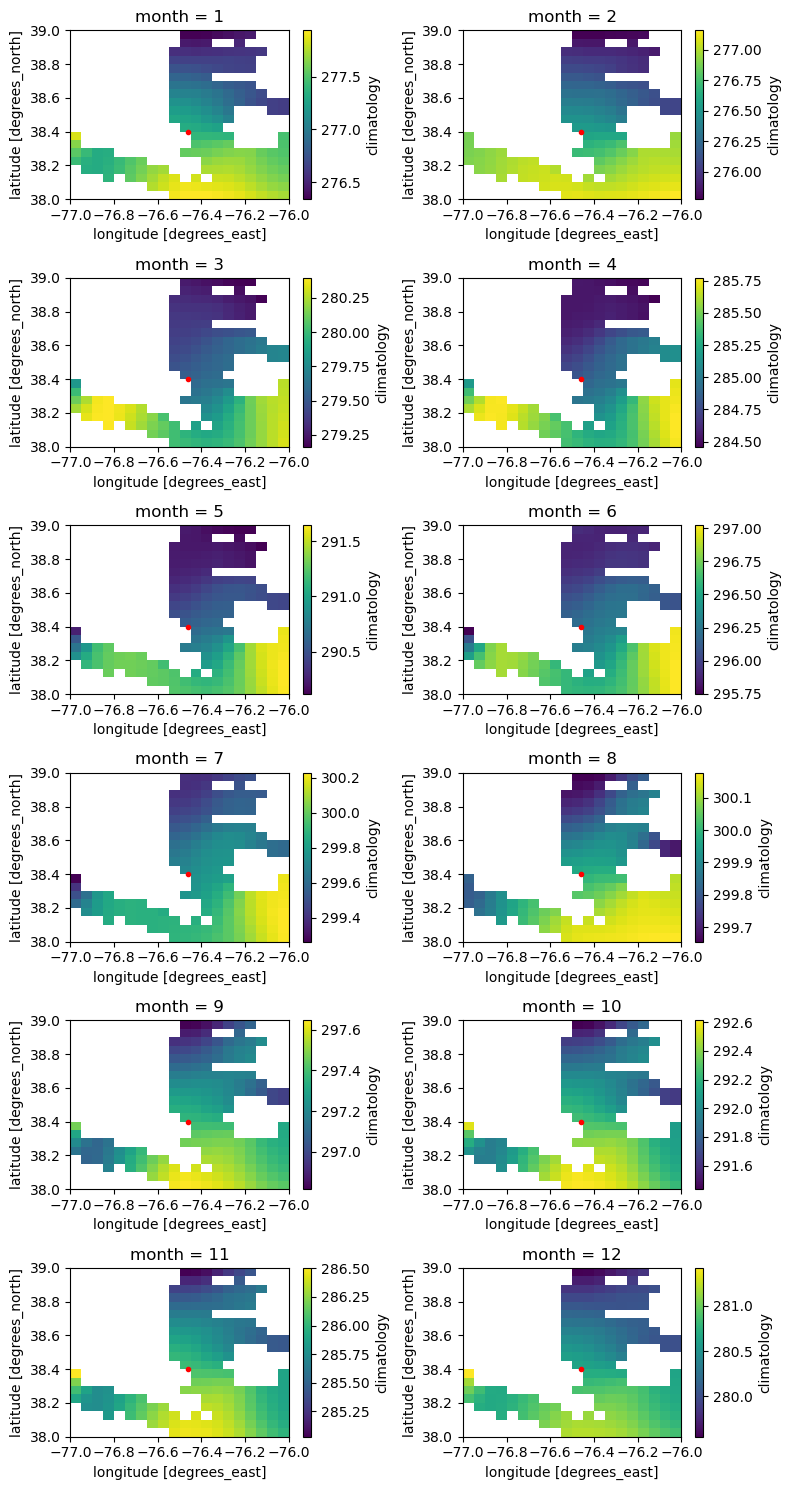

In [17]:
fig, axes = plt.subplots(6, 2)
fig.set_size_inches(8, 15)

axes = axes.flatten()
for i in range(12):
    # Just Patapsco outflow
    oneyear.sel(lat=slice(38.0, 39.0), lon=slice(-77.0, -76.0)).groupby('time.month').mean().sel(month=i+1).plot(ax=axes[i])
    axes[i].plot(-76.46, 38.40, 'ro', markersize=3) 
    
plt.tight_layout()

Full Region

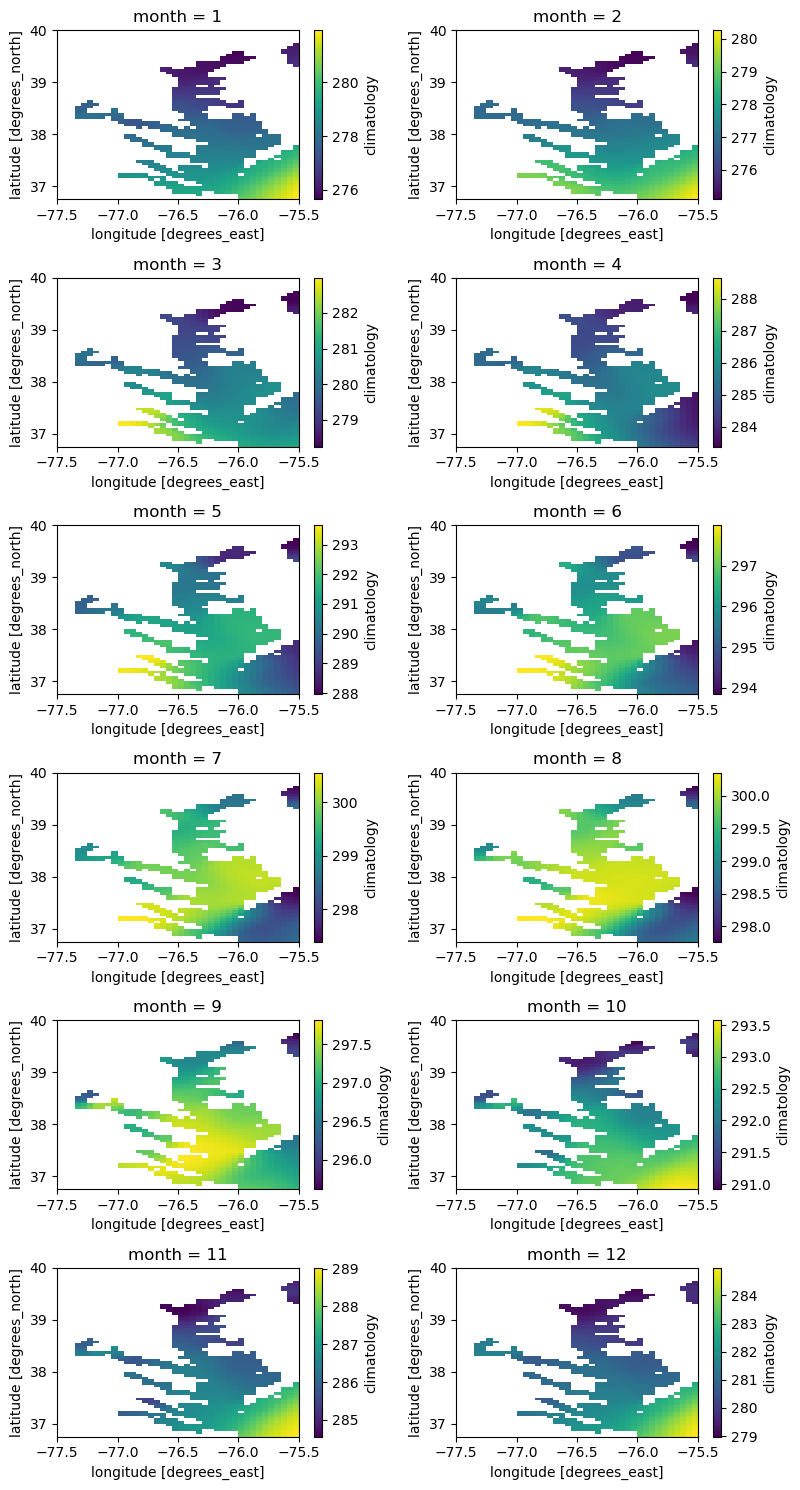

In [6]:
fig, axes = plt.subplots(6, 2)
fig.set_size_inches(8, 15)

axes = axes.flatten()
for i in range(12):
    # Just Patapsco outflow
    oneyear.groupby('time.month').mean().sel(month=i+1).plot(ax=axes[i])
    
plt.tight_layout()

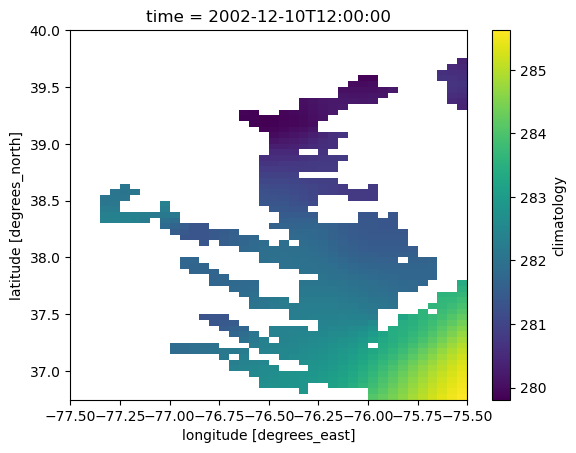

In [8]:
clim.isel(time=100).plot()